In [1]:
!pip install gap_stat

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap_stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=b3c2dcc963756cb35fbbed35db765a56e86e9fad37b732da6ab1a7bdfba75f4c
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap_stat


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.express as px
from gap_statistic import OptimalK
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score,silhouette_samples

## Trabajo Practico 1 - Mineria de Datos:

Columnas del dataset:

N = Nitrogen

P = phosphorous

K = Potassium

Temperature=The average soil temperatures for bioactivity range from 50 to 75F.

Ph = A scale used to identify acidity or basicity nature; (Acid Nature- Ph<7; Neutral- Ph=7; Base Nature-P>7)

label = Types of Crop (Rice, Maize, Chickpea; Kidney beans; pigeonpeas; mothbeans; mungbean;blackgram; lentil; pomegranate; banana; mango; grapes; watermelon; muskmelon; apple; orange;papaya; coconut; cotton; jute; coffee)

In [ ]:
# Carga del dataset
cultivos = pd.read_csv('Crop_recommendation.csv')

# Cambio de tipo de datos
cultivos['label'] = cultivos['label'].astype('category')

## 02. Analisis descriptivo:

In [ ]:
# No hay valores nulos, los tipos de dato estan bien
cultivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   N            2200 non-null   int64   
 1   P            2200 non-null   int64   
 2   K            2200 non-null   int64   
 3   temperature  2200 non-null   float64 
 4   humidity     2200 non-null   float64 
 5   ph           2200 non-null   float64 
 6   rainfall     2200 non-null   float64 
 7   label        2200 non-null   category
dtypes: category(1), float64(4), int64(3)
memory usage: 123.3 KB


In [ ]:
cultivos.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
cultivos.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [ ]:
# Distintos tipos de cultivos
cultivos['label'].unique()

['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', ..., 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
Length: 22
Categories (22, object): ['apple', 'banana', 'blackgram', 'chickpea', ..., 'pigeonpeas',
                          'pomegranate', 'rice', 'watermelon']

In [ ]:
# Cantidad de cultivos distintos:
len(cultivos['label'].unique())

22

In [ ]:
# Cantidad de filas de cada cultivo:
cultivos['label'].value_counts()

apple          100
banana         100
rice           100
pomegranate    100
pigeonpeas     100
papaya         100
orange         100
muskmelon      100
mungbean       100
mothbeans      100
mango          100
maize          100
lentil         100
kidneybeans    100
jute           100
grapes         100
cotton         100
coffee         100
coconut        100
chickpea       100
blackgram      100
watermelon     100
Name: label, dtype: int64

In [ ]:
# Algunas medidas de resumen
cultivos.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Se busca la presencia de valores atipicos ya que PCA es altamente sensible a los mismos.

--------------------------------------------------------------------

*La busqueda se hace respecto a determinada dimension, deberiamos buscar respecto a multiples. *

*Apunte: cuando se trata con múltiples dimensiones el proceso se complica.*
*Por ejemplo, considera un hombre que mide 2 metros y pesa 50 kg. Ninguno de los dos valores es atípico de forma individual, pero en conjunto se trataría de un caso muy excepcional. La distancia de Mahalanobis es una medida de distancia entre un punto y la media que se ajusta en función de la correlación entre dimensiones y que permite encontrar potenciales outliers en distribuciones multivariante. *

--------------------------------------------------------------------

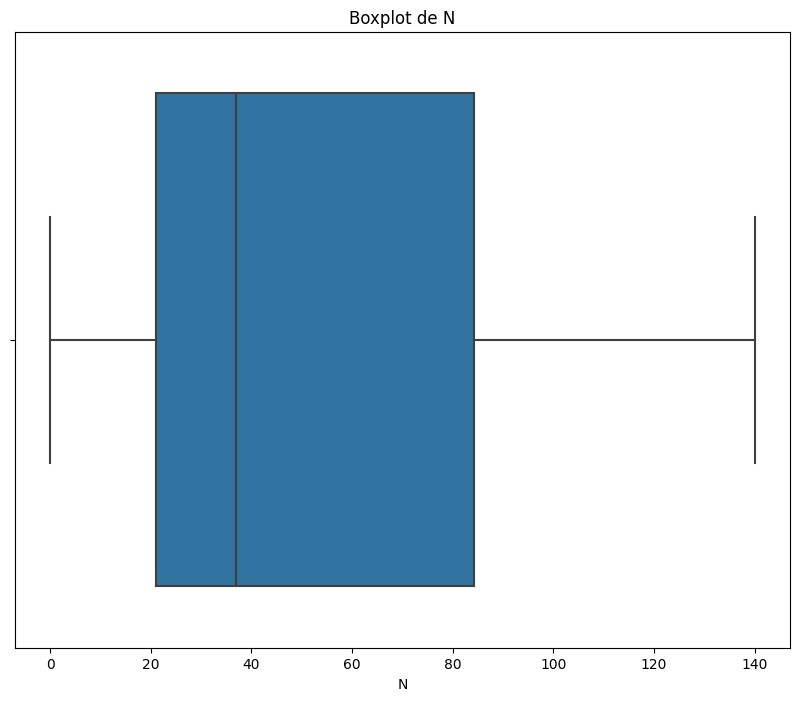

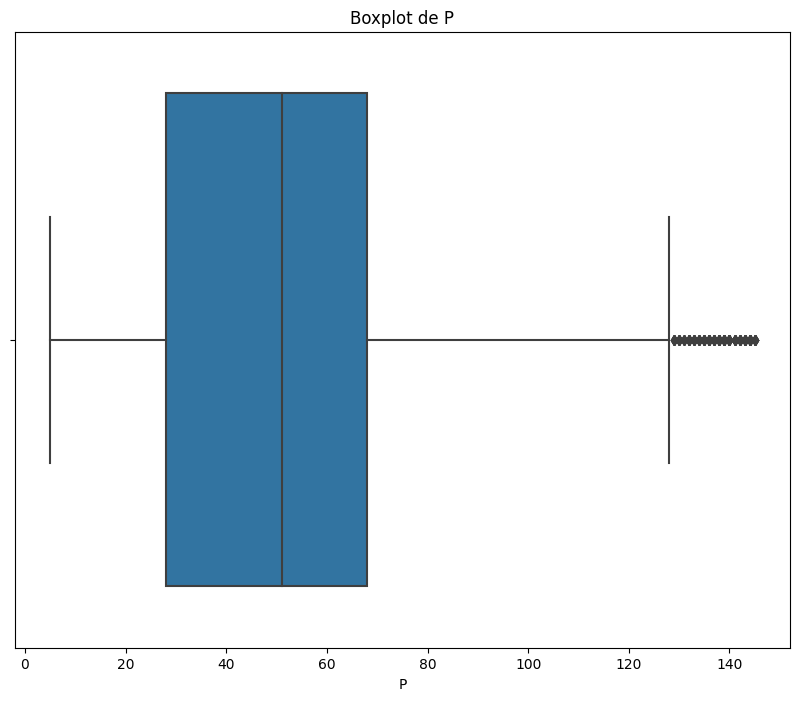

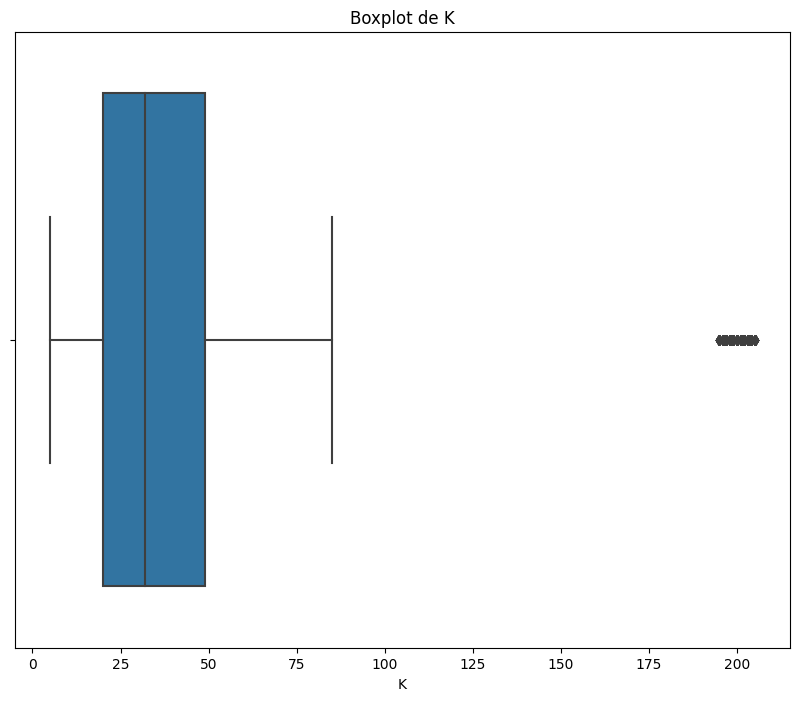

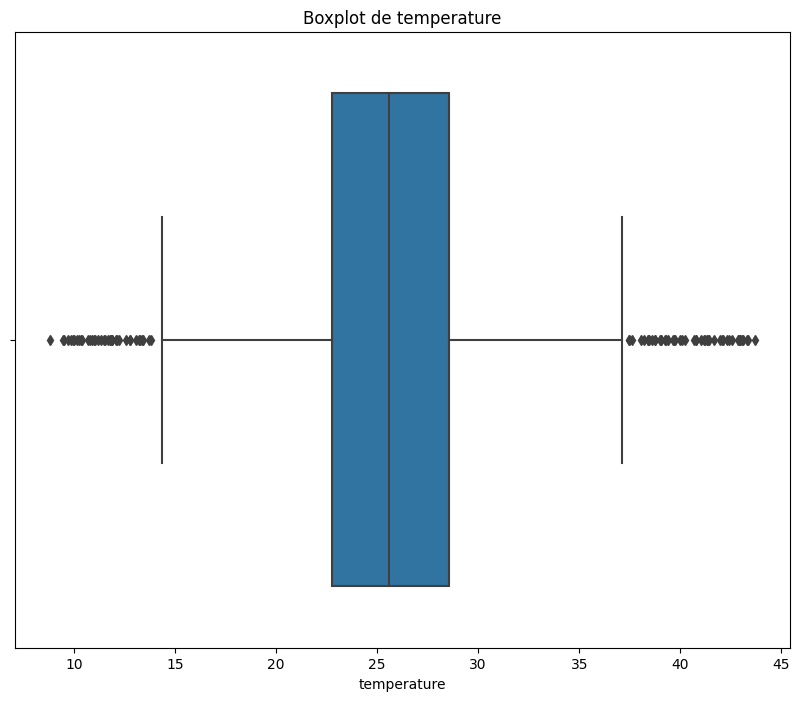

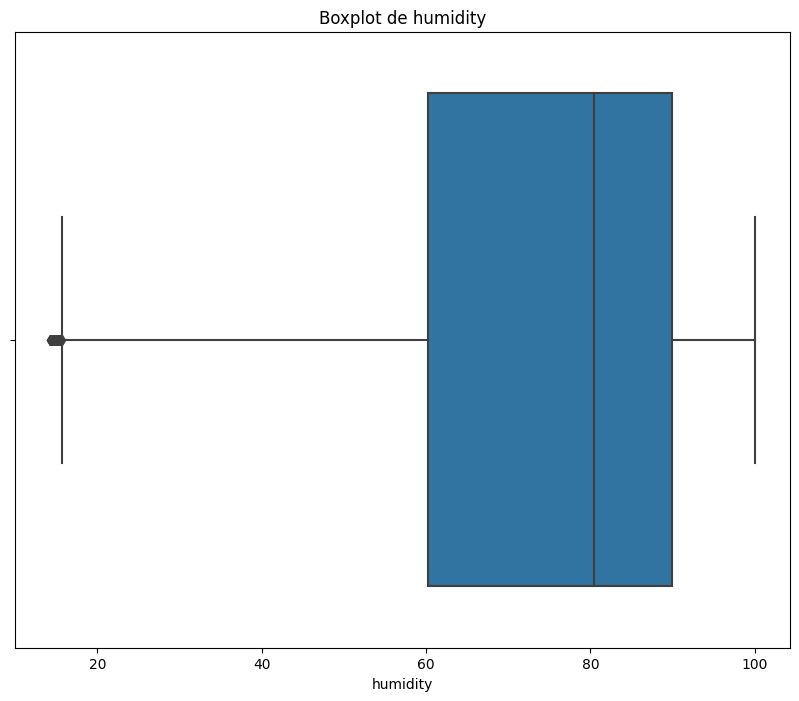

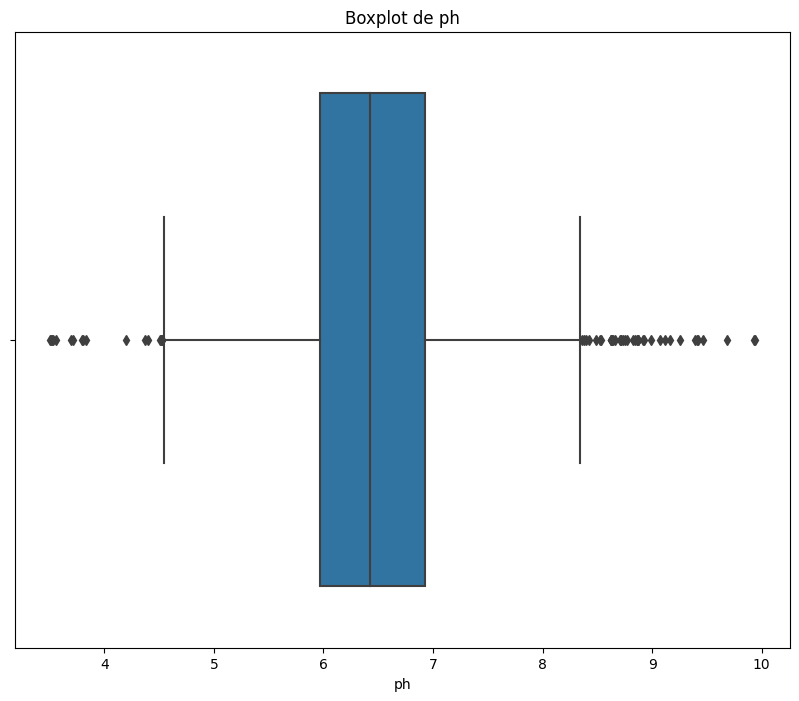

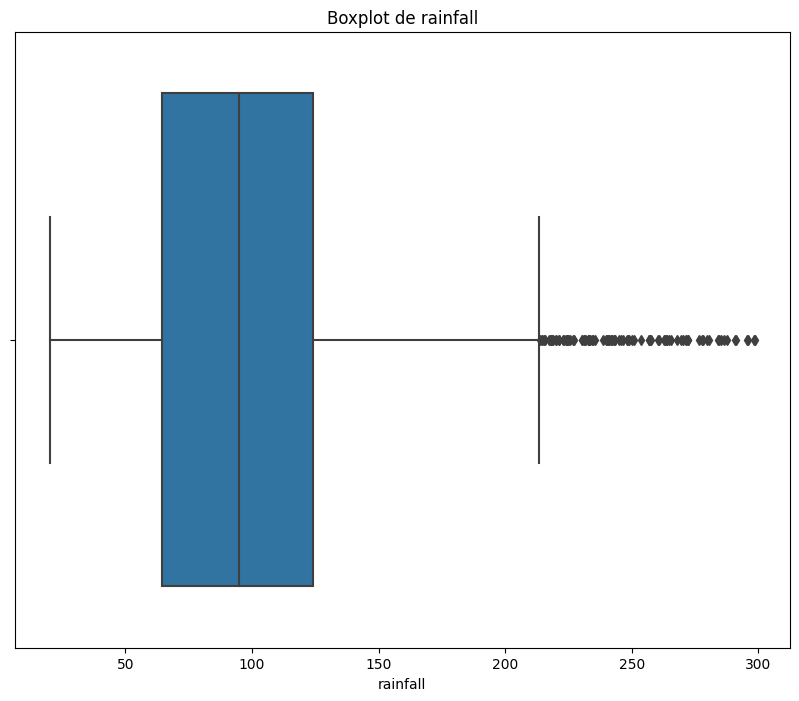

In [ ]:
# Boxplot de cada variable para detectar valores atipicos:
for columna in cultivos.drop(['label'], axis=1).columns:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=cultivos[columna])
    plt.title(f'Boxplot de {columna}')
    plt.show()

Aparentemente hay muchos valores atipicos, se puede hacer boxplot de cada variable agrupado por tipo de grano para ver mejor.

<Figure size 2500x1500 with 0 Axes>

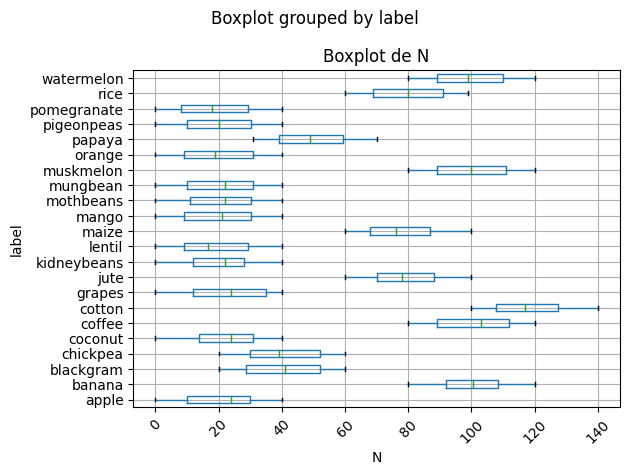

<Figure size 2500x1500 with 0 Axes>

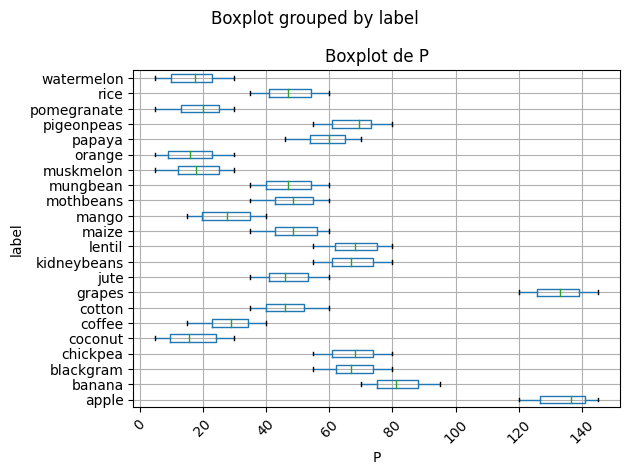

<Figure size 2500x1500 with 0 Axes>

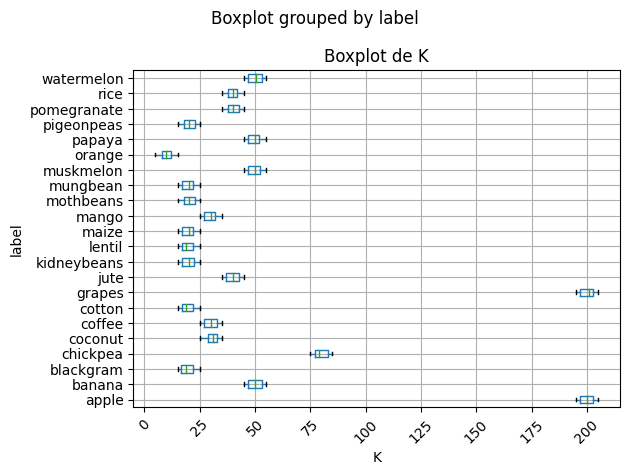

<Figure size 2500x1500 with 0 Axes>

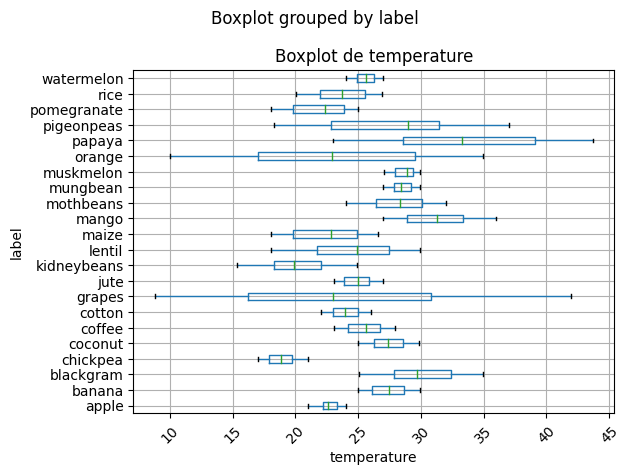

<Figure size 2500x1500 with 0 Axes>

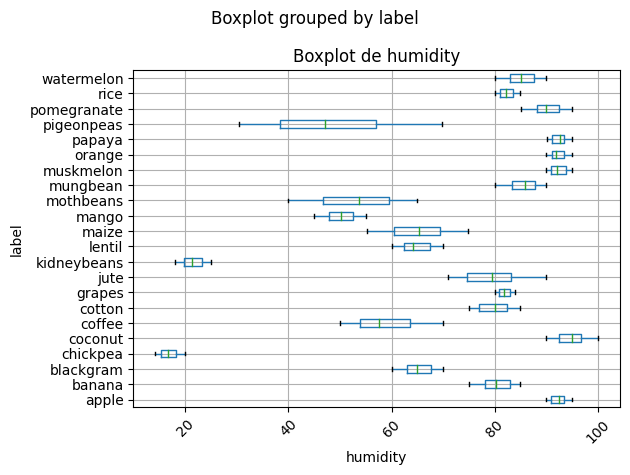

<Figure size 2500x1500 with 0 Axes>

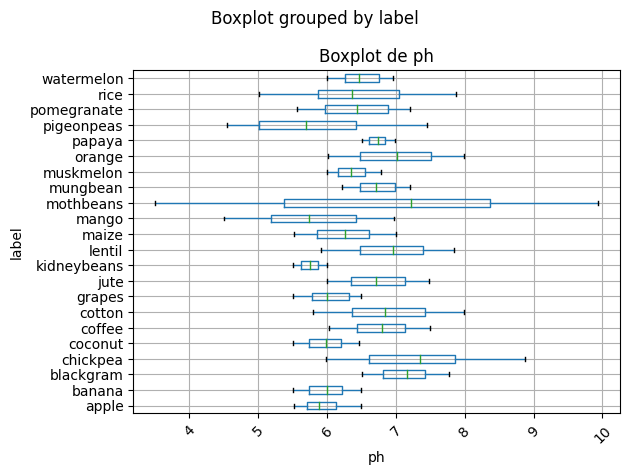

<Figure size 2500x1500 with 0 Axes>

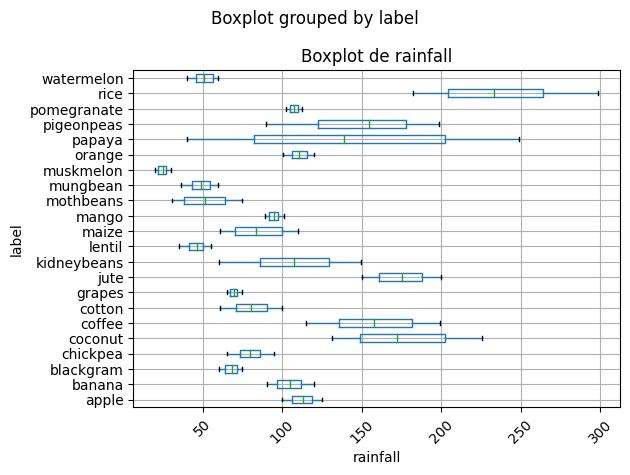

In [ ]:
columnas = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for columna in columnas:
    plt.figure(figsize=(25, 15))  # Ajusta el tamaño del gráfico si es necesario
    cultivos.boxplot(column=columna, by='label', vert=False)
    plt.xlabel(columna)
    plt.ylabel('label')
    plt.title(f'Boxplot de {columna}')
    plt.xticks(rotation=45)  # Rotar etiquetas en el eje x si es necesario
    plt.tight_layout()
    plt.show()

Se confirma que no hay valores atipicos, sino que para cada una de las variables las diferentes categorias tienen sus propias caracteristicas entonces al evaluarlas todas como una misma variable se presentan como tal.

In [ ]:
# Medidas de resumen mas adecuadas agrupadas por categoria:
cultivos.groupby('label').describe().transpose()

label                   apple      banana   blackgram    chickpea     coconut  \
N           count  100.000000  100.000000  100.000000  100.000000  100.000000   
            mean    20.800000  100.230000   40.020000   40.090000   21.980000   
            std     11.863704   11.107241   12.664258   12.150649   11.761931   
            min      0.000000   80.000000   20.000000   20.000000    0.000000   
            25%     10.000000   92.000000   28.750000   30.000000   13.750000   
            50%     24.000000  100.500000   41.000000   39.000000   24.000000   
            75%     30.000000  108.250000   52.000000   52.000000   31.000000   
            max     40.000000  120.000000   60.000000   60.000000   40.000000   
P           count  100.000000  100.000000  100.000000  100.000000  100.000000   
            mean   134.220000   82.010000   67.470000   67.790000   16.930000   
            std      8.139665    7.690339    7.151259    7.498545    8.357244   
            min    120.000000   70.000000   55.000000   55.000000    5.000000   
            25%    126.750000   75.000000   62.000000   61.000000    9.750000   
            50%    136.500000   81.000000   67.000000   68.000000   15.500000   
            75%    141.000000   88.000000   74.000000   74.000000   24.250000   
            max    145.000000   95.000000   80.000000   80.000000   30.000000   
K           count  100.000000  100.000000  100.000000  100.000000  100.000000   
            mean   199.890000   50.050000   19.240000   79.920000   30.590000   
            std      3.320871    3.382591    3.188109    3.261901    2.998636   
            min    195.000000   45.000000   15.000000   75.000000   25.000000   
            25%    197.000000   47.000000   16.750000   77.000000   29.000000   
            50%    200.000000   50.000000   19.000000   79.000000   31.000000   
            75%    203.000000   53.000000   22.000000   83.000000   33.000000   
            max    205.000000   55.000000   25.000000   85.000000   35.000000   
temperature count  100.000000  100.000000  100.000000  100.000000  100.000000   
            mean    22.630942   27.376798   29.973340   18.872847   27.409892   
            std      0.827404    1.428359    2.686357    1.169838    1.385734   
            min     21.036527   25.010185   25.097374   17.024985   25.008724   
            25%     22.163206   26.108408   27.822763   17.877953   26.268718   
            50%     22.628290   27.443333   29.655515   18.878291   27.385317   
            75%     23.344066   28.657735   32.379701   19.711637   28.600213   
            max     23.996862   29.908885   34.946616   20.995022   29.869083   
humidity    count  100.000000  100.000000  100.000000  100.000000  100.000000   
            mean    92.333383   80.358123   65.118426   16.860439   94.844272   
            std      1.458551    2.805481    2.798326    1.711979    2.686329   
            min     90.025751   75.031933   60.065349   14.258040   90.017345   
            25%     90.970127   78.062229   63.040532   15.392700   92.544995   
            50%     92.416541   80.223599   65.026723   16.658634   94.960581   
            75%     93.509252   82.960240   67.741171   18.265986   96.759684   
            max     94.920481   84.978492   69.961000   19.969789   99.981876   
ph          count  100.000000  100.000000  100.000000  100.000000  100.000000   
            mean     5.929663    5.983893    7.133952    7.336957    5.976562   
            std      0.268932    0.270650    0.372533    0.801127    0.287632   
            min      5.514253    5.505394    6.500145    5.988993    5.501580   
            25%      5.705800    5.740712    6.812736    6.603967    5.731053   
            50%      5.885818    5.994462    7.165240    7.356537    5.990709   
            75%      6.135616    6.211092    7.419390    7.861625    6.209201   
            max      6.499227    6.490074    7.775306    8.868741    6.470466   
rainfall    count  100.000000  

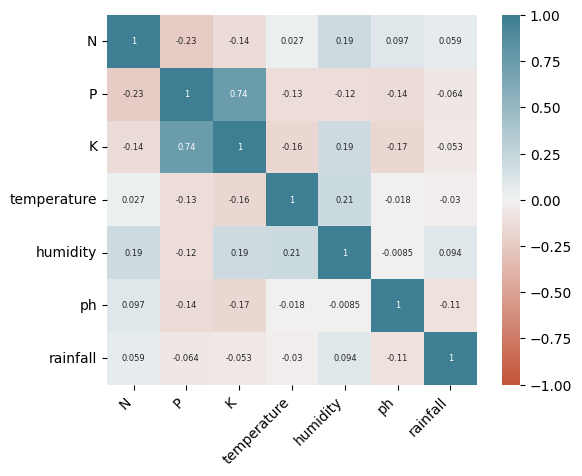

In [ ]:
corr = cultivos.drop(['label'], axis=1).corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

No hay correlaciones muy fuertes, destaca la de fosforo con potasio con 0.74 de coeficiente

Estandarizacion z-score para que las variables tengan media = 0 y sd = 1, además no habrá variables que dominen al resto.

In [ ]:
# Descartamos la columna con los tipos de cultivos:
cultivos_2 = cultivos.drop(['label'], axis=1)

cultivos_z = (cultivos_2 - cultivos_2.mean()) / cultivos_2.std()

## 03. PCA:

**Consigna**: *Realizar PCA y determinar el número de componentes principales considerando alguno de los 3 criterios dados en la práctica. Graficar la varianza acumulada y las componentes de PCA en un grafico 2 o 3D con sus respectivas clases.*

In [ ]:
# Obtener todas las componentes principales:
pca = PCA( n_components=cultivos_2.shape[1], random_state=0 ) # n_components: tantos componentes como columnas, random_state: con esto nos aseguramos volver a obtener los mismos
                                                              # resultados si volvemos a correr el algoritmo con la misma semilla

componentes_principales = pca.fit_transform(cultivos_z)

# Creacion de un dataframe con las componentes principales
pca_df = pd.DataFrame( data=componentes_principales, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

# Se agregan los tipos de cultivos al df con las componentes principales
pca_df['label'] = cultivos['label']

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label
0,-0.582737,-0.844394,1.373031,-1.613762,0.308154,-0.095975,-0.025234,rice
1,-0.474527,-0.784716,1.251893,-1.792355,1.107493,-0.532134,-0.280479,rice
2,-0.633924,-0.694365,1.179064,-1.817692,2.522690,-0.538428,-0.105943,rice
3,-1.047682,-1.087411,1.393035,-0.982177,1.448452,-0.656779,0.275209,rice
4,-0.873059,-0.658523,1.455354,-2.334481,1.959188,-0.317952,0.052728,rice
...,...,...,...,...,...,...,...,...
2195,-1.260634,-0.618222,0.711136,-1.014740,0.133200,-1.122004,0.306955,coffee
2196,-1.355275,-0.154008,0.701489,-0.197638,-0.898453,-0.771301,0.684801,coffee
2197,-1.158120,-0.640329,1.045602,-1.301545,-0.491653,-0.884927,0.203417,coffee
2198,-1.218911,0.052378,0.180814,-0.990274,-0.601252,-1.308669,0.509541,coffee


Se observa cada una de las filas del dataset representadas con todas las componentes

In [ ]:
# Función para acumular la varianza:
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [ ]:
# Calculo de la varianza acumulada componente a componente:
varianza_acumulada = acumular(pca.explained_variance_ratio_) # pca.explained_variance_ratio_ porcentaje de varianza que cubre cada componente

# df con valores de los autovectores, proporcion de varianza que explica cada variable y la proporcion acumulada hasta dicha variable
pca_rtd = pd.DataFrame({'Autovalores':pca.explained_variance_, 'Proporción de variancia explicada':pca.explained_variance_ratio_,
                        'Proporción acumulado de variancia explicada': varianza_acumulada})
pca_rtd

,Autovalores,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,1.931218,0.275888,0.275888
1,1.293910,0.184844,0.460733
2,1.076509,0.153787,0.614520
3,1.022891,0.146127,0.760647
4,0.805928,0.115133,0.875780
5,0.676562,0.096652,0.972431
6,0.192981,0.027569,1.000000


**Criterios de selección:**
* Proporción de variancia acumulada (~75% -80%)​
* Criterio de Kaiser (eigenvalues > 1)​
* Gráfico del codo (Scree)

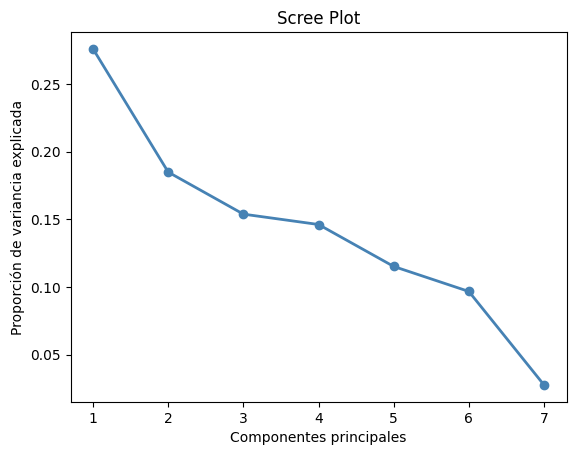

In [ ]:
# Grafico de codo, con la varianza acumulada por componente:
numero_componente = np.arange(pca.n_components_) + 1
plt.plot(numero_componente, pca.explained_variance_ratio_, 'o-', linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.show()

De acuerdo a los criterios de seleccion vistos lo mas conveniente seria quedarnos con 4 componentes ya que cumplen con 2 de los tres.
Usando las primeras 4 la proporcion de varianza acumulada es del 76% y los autovalores son mayores a 1.
Pero tomamos la decision de quedarnos con 3 debido a que se pierde la representacion grafica que es una de las cosas que nos interesa interpretar a costa de tener una varianza acumulada del 61%

In [ ]:
# Grafico 3D con componentes 1, 2 y 3:
fig_3d = px.scatter_3d(componentes_principales, x=0, y=1, z=2,
              color=pca_df["label"],  labels={'color': 'label'})
fig_3d.show()

En el grafico se puede observar que en cuanto a mantener la distancias entre las diferentes clases el resultado no es demasiado bueno con 3 componentes, se ve una nube de puntos bastante mezclada.

In [ ]:
# Grafico 3D con componentes 1, 2 y 4 para ver si mejora el tema que los puntos se superponen y estan bastante dispersos:
fig_3d = px.scatter_3d(componentes_principales, x=0, y=1, z=3,
              color=pca_df["label"],  labels={'color': 'label'})
fig_3d.show()

Se probo cambiando la 3ra componente por la 4ta y los resultados no mejoran.

## 04. ISOMAP:

Consigna: Aplicar Isomap y analizar los resultados obtenidos variando el numero de vecinos y componentes. Realizar un grafico en 2D de utilizando dos componentes.

Creamos 3 modelos con ISOMAP variando el numero de vecinos y con el mismo numero de componentes ya que un mayor numero de componentes nos impediria graficar y poder analizar un poco los resultados

In [ ]:
# Creacion del primer modelo: 2 componentes, 5 vecinos
isomap_01 = Isomap(n_neighbors=5, n_components=2)
isomap_01.fit(cultivos_z)
proyecciones_isomap_01 = isomap_01.transform(cultivos_z)

df_proyecciones_isomap_01 = pd.DataFrame(proyecciones_isomap_01, columns=['Component 1', 'Component 2'])
df_proyecciones_isomap_01['label'] = cultivos['label']

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning:

The number of connected components of the neighbors graph is 7 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more effi

In [ ]:
# Creacion del segundo modelo: 2 componentes, 10 vecinos
isomap_02 = Isomap(n_neighbors=10, n_components=2)
isomap_02.fit(cultivos_z)
proyecciones_isomap_02 = isomap_02.transform(cultivos_z)

df_proyecciones_isomap_02 = pd.DataFrame(proyecciones_isomap_02, columns=['Component 1', 'Component 2'])
df_proyecciones_isomap_02['label'] = cultivos['label']

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning:

The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [ ]:
# Creacion del tercer modelo: 2 componentes, 30 vecinos
isomap_03 = Isomap(n_neighbors=30, n_components=2)
isomap_03.fit(cultivos_z)
proyecciones_isomap_03 = isomap_03.transform(cultivos_z)

df_proyecciones_isomap_03 = pd.DataFrame(proyecciones_isomap_03, columns=['Component 1', 'Component 2'])
df_proyecciones_isomap_03['label'] = cultivos['label']

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [ ]:
# Grafico del primer modelo: 2 componentes, 5 vecinos
fig_isomap_01 = px.scatter(
    df_proyecciones_isomap_01, x='Component 1', y='Component 2',
    color=df_proyecciones_isomap_01['label'], labels={'color': 'label'}
)
fig_isomap_01.update_traces(marker_size=8)
fig_isomap_01.show()

k=5, en general los elementos de una misma clase se encuentran en la misma zona del grafico pero hay bastante superposicion entre clases distintas en algunas zonas.

In [ ]:
# Creacion del segundo modelo: 2 componentes, 10 vecinos
fig_isomap_02 = px.scatter(
    df_proyecciones_isomap_02, x='Component 1', y='Component 2',
    color=df_proyecciones_isomap_02['label'], labels={'color': 'label'}
)
fig_isomap_02.update_traces(marker_size=8)
fig_isomap_02.show()

k=10, en este caso nuevamente los puntos de una misma clase tienden a estar juntos dentro todo pero hay una zona bastante grande donde se encuentran superpuestos con los de otras clases

In [ ]:
# Creacion del tercer modelo: 2 componentes, 30 vecinos
fig_isomap_03 = px.scatter(
    df_proyecciones_isomap_03, x='Component 1', y='Component 2',
    color=df_proyecciones_isomap_03['label'], labels={'color': 'label'}
)
fig_isomap_03.update_traces(marker_size=8)
fig_isomap_03.show()

k=30, todas las clases una muy cerca de la otra

Conclusion: de todos los casos probados con ISOMAP al parecer el mejor seria el de k=5 debido a que es donde menos superposicion entre clases hay y se mantiene bastante cerca a los puntos de una misma clase.

## 05. TSNE:

Consigna: 5. Aplicar t-SNE y analizar los resultados obtenidos variando el número de iteraciones, componentes y perplejidad. Realizar un gráfico en 2D de utilizando dos componentes.

Implementando t-SNE notamos que al disminuir la perplejidad, es practicamente imposible distinguir claramente a las categorias, mientras que si la aumentamos, las categorias tienden a agruparse en un área mucho menor.

Esto último podría ser un caso deseable, pero perderíamos las relaciones "parecidas" en favor de una mayor claridad en su distinción.

Respecto al número de iteraciones, con el mínimo, parece no separar los elementos de los conjuntos, asignando practicamente todos los elementos de cada conjunto a un área sumamente reducida del plano. Con un número de iteraciones mayor, el tiempo para el procesamiento es mayor y no parece haber un cambio notable respecto al valor estandar de 1000 iteraciones.

Caso de baja perplejidad

In [ ]:
tsne = TSNE(n_components=2, random_state=0, perplexity=1)
projections_tsne = tsne.fit_transform(cultivos_z, )

fig = px.scatter(
    projections_tsne, x=0, y=1,
    color=cultivos['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

Caso de alta perplejidad

In [ ]:
tsne = TSNE(n_components=2, random_state=0, perplexity=30)
projections_tsne = tsne.fit_transform(cultivos_z, )

fig = px.scatter(
    projections_tsne, x=0, y=1,
    color=cultivos['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

Caso de perplejidad intermedia e iteraciones estandar

In [ ]:
tsne = TSNE(n_components=2, random_state=0, perplexity=15)
projections_tsne = tsne.fit_transform(cultivos_z, )

fig = px.scatter(
    projections_tsne, x=0, y=1,
    color=cultivos['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

Caso de perplejidad intermedia y aumento de iteraciones

In [ ]:
tsne = TSNE(n_components=2, random_state=0, perplexity=15, n_iter=10000)
projections_tsne = tsne.fit_transform(cultivos_z, )

fig = px.scatter(
    projections_tsne, x=0, y=1,
    color=cultivos['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

Caso con el minimo de iteraciones

In [ ]:
tsne = TSNE(n_components=2, random_state=0, perplexity=7, n_iter=250)
projections_tsne = tsne.fit_transform(cultivos_z, )

fig = px.scatter(
    projections_tsne, x=0, y=1,
    color=cultivos['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

## 06. K-means

Consigna: Aplicar K-means y analizar los resultados obtenidos variando el número de clusters y obtener el número óptimo de clusters mediante GAP. Realizar un gráfico en 3D de utilizando tres atributos de los datos y donde los colores estén asociados a los clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

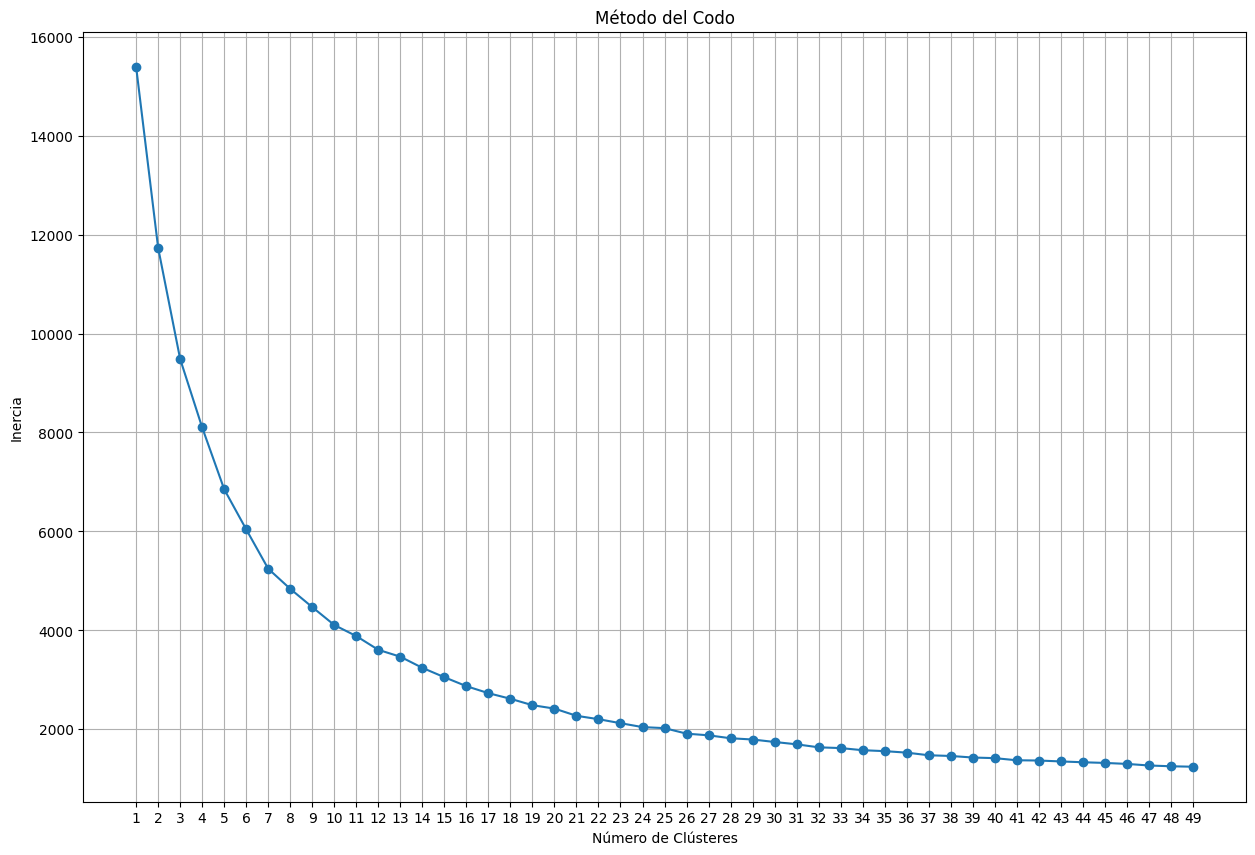

In [ ]:
inercia = []
# calculamos la
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=0) # creamos modelo de objeto kmins, con iteracion de 1 a 50 para ver con que cluster me quedo
    kmeans.fit(cultivos_z)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(15, 10))
plt.plot(range(1, 50), inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.xticks(np.arange(1, 50))
plt.grid(True)
plt.show()

Observamos que en el rango (1,25) la inercia baja de 16000 hasta 2000 casi, hablamos de 14000. Y a partir de 25 hasta 50 baja solo 1000. Asi que comenzaremos con ese numero de clusters y luego probaremos un valor muy pequeño para ver las diferencias.

### k=25

In [ ]:
kmeans_01 = KMeans(n_clusters=25)
kmeans_01.fit(cultivos_z) #Entrenamos el modelo
cultivos_kmeans_01 = cultivos.copy()

# El metodo labels_ nos da a que cluster corresponde cada observacion
cultivos_kmeans_01['Cluster KMeans'] = kmeans_01.labels_ # .labels_ nos dice como seteo la obersvacion

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Caracteristicas de cada cluster:

In [ ]:
# saco la media para ver un poco las caracteristicas de cada cluster
cultivos_kmeans_01.groupby('Cluster KMeans').mean()

<ipython-input-9-cda70bf25a7a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cultivos_kmeans_01.groupby('Cluster KMeans').mean()


,N,P,K,temperature,humidity,ph,rainfall
Cluster KMeans,,,,,,,
0,18.818182,17.757576,20.833333,17.254042,91.499756,7.090643,108.983609
1,100.230000,82.010000,50.050000,27.376798,80.358123,5.983893,104.626980
2,34.175676,65.932432,19.472973,29.561373,63.328235,7.219380,62.992468
3,76.618644,47.508475,41.220339,25.067930,81.483491,6.655349,173.607642
4,20.976744,134.007752,199.868217,22.891284,89.986086,5.967942,103.016580
5,20.419355,67.314516,22.991935,19.962598,24.449328,5.697044,111.579616
6,19.370787,31.505618,28.179775,30.563010,50.574534,6.048205,86.831882
7,22.222222,17.343434,30.333333,27.497742,94.815592,5.975822,176.529339
8,99.870000,17.360000,50.150000,27.127416,88.751589,6.427292,37.738086


In [ ]:
observaciones_por_cluster = cultivos_kmeans_01['Cluster KMeans'].value_counts().sort_index()
observaciones_por_cluster

0      66
1     100
2     148
3     118
4     129
5     124
6      89
7      99
8     200
9      94
10     52
11     47
12    132
13    124
14     38
15     33
16     57
17     53
18     81
19    100
20     39
21     66
22     70
23     89
24     52
Name: Cluster KMeans, dtype: int64

<ipython-input-11-3e48210d75cd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cultivos_kmeans_01.groupby('Cluster KMeans').sum().plot(kind='bar', figsize=(10, 6))


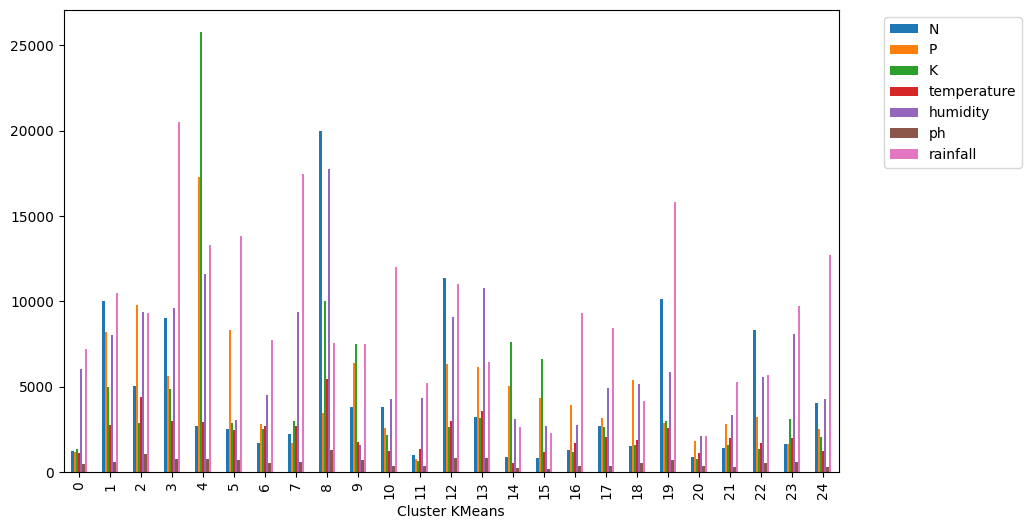

In [ ]:
cultivos_kmeans_01.groupby('Cluster KMeans').sum().plot(kind='bar', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Graficamos en base a 3 dimensiones pero con las caracteristicas estandarizadas para poder tener mejor perspectiva de las agrupaciones:

In [ ]:
cultivos_z_kmeans_01 = cultivos_z.copy()

# El metodo labels_ nos da a que cluster corresponde cada observacion
cultivos_z_kmeans_01['Cluster KMeans'] = kmeans_01.labels_ # .labels_ nos dice como seteo la obersvacion

# Número de clústeres
num_clusters = 25

# Define tu propia paleta de colores discreta con suficientes colores
custom_discrete_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                          '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
                          '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
                          '#c6dbef', '#fdd0a2', '#b3e2cd', '#f0f0f0', '#1abc9c']

# Asignar colores discretos a cada clúster
cluster_colors = custom_discrete_colors[:num_clusters]

# Agregar una nueva columna con los colores discretos al DataFrame
cultivos_z_kmeans_01['Color'] = cultivos_z_kmeans_01["Cluster KMeans"].apply(lambda x: cluster_colors[x])

# Crear el gráfico 3D
fig_3d = px.scatter_3d(cultivos_z_kmeans_01, x='temperature', y='rainfall', z='humidity',
                        color='Color',
                        labels={'color': 'Cluster KMeans'})

# Mostrar el gráfico
fig_3d.show()


In [ ]:
fig_3d = px.scatter_3d(cultivos_z_kmeans_01, x='N', y='P', z='K',
                        color='Color',
                        labels={'color': 'Cluster KMeans'})

fig_3d.show()

In [ ]:
fig_3d = px.scatter_3d(cultivos_z_kmeans_01, x='N', y='P', z='rainfall',
                        color='Color',
                        labels={'color': 'Cluster KMeans'})

fig_3d.show()

Estamos graficando 3 caracteristicas de 7 que son en total, se puede notar en base a 3 que los elementos de un mismo cluster se encuentran dentro de una misma zona, pero se ve superposicion. Se esperaria que al agregar el resto de caracteristicas la dispersion intercluster se note mas.

### k=5 (en este ejemplo se realiza lo mismo que en el anterior pero con una cantidad de clusters muy pequeña)

In [ ]:
kmeans_02 = KMeans(n_clusters=5)
kmeans_02.fit(cultivos_z) #Entrenamos el modelo
cultivos_kmeans_02 = cultivos.copy()

# El metodo labels_ nos da a que cluster corresponde cada observacion
cultivos_kmeans_02['Cluster KMeans'] = kmeans_02.labels_ # .labels_ nos dice como seteo la obersvacion

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Caracteristicas por cluster:

In [ ]:
# saco la media para ver un poco las caracteristicas de cada cluster
cultivos_kmeans_02.groupby('Cluster KMeans').mean()

<ipython-input-16-496c5d01dc8d>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,N,P,K,temperature,humidity,ph,rainfall
Cluster KMeans,,,,,,,
0,25.720893,52.151515,23.167464,29.567871,65.477822,6.627878,74.105380
1,99.459750,41.491950,37.506261,25.634957,78.639280,6.437042,75.952024
2,21.990000,133.375000,200.000000,23.240259,87.104305,5.977800,91.133304
3,28.748936,67.451064,45.578723,19.676009,23.388612,6.424959,98.681224
4,48.937824,32.778929,34.067358,24.550650,85.196506,6.517175,168.017338


In [ ]:
observaciones_por_cluster_02 = cultivos_kmeans_02['Cluster KMeans'].value_counts().sort_index()
observaciones_por_cluster

0      66
1     100
2     148
3     118
4     129
5     124
6      89
7      99
8     200
9      94
10     52
11     47
12    132
13    124
14     38
15     33
16     57
17     53
18     81
19    100
20     39
21     66
22     70
23     89
24     52
Name: Cluster KMeans, dtype: int64

<ipython-input-18-d45eccdbc10e>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



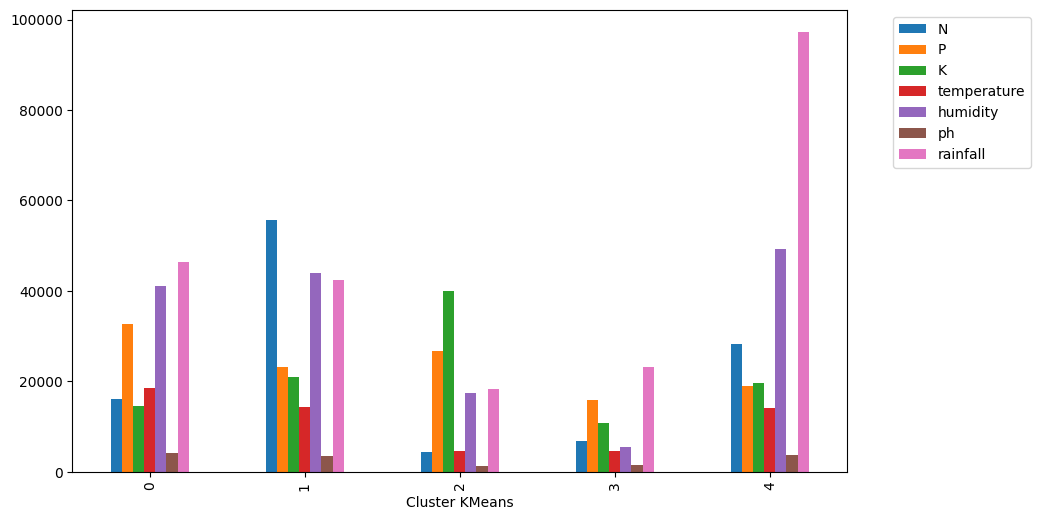

In [ ]:
cultivos_kmeans_02.groupby('Cluster KMeans').sum().plot(kind='bar', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Grafico de puntos de cada cluster con datos estandarizados:

In [ ]:
cultivos_z_kmeans_02 = cultivos_z.copy()
cultivos_z_kmeans_02['Cluster KMeans'] = kmeans_02.labels_ # .labels_ nos dice como seteo la obersvacion

# Número de clústeres
num_clusters = 5

# Define tu propia paleta de colores discreta con suficientes colores
custom_discrete_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Asignar colores discretos a cada clúster
cluster_colors = custom_discrete_colors[:num_clusters]

# Agregar una nueva columna con los colores discretos al DataFrame
cultivos_z_kmeans_02['Color'] = cultivos_z_kmeans_02["Cluster KMeans"].apply(lambda x: cluster_colors[x])

# Crear el gráfico 3D
fig_3d = px.scatter_3d(cultivos_z_kmeans_02, x='temperature', y='rainfall', z='humidity',
                        color='Color',
                        labels={'color': 'Cluster KMeans'})

# Mostrar el gráfico
fig_3d.show()


In [ ]:
fig_3d = px.scatter_3d(cultivos_z_kmeans_02, x='N', y='P', z='K',
                        color='Color',
                        labels={'color': 'Cluster KMeans'})

fig_3d.show()

In [ ]:
fig_3d = px.scatter_3d(cultivos_z_kmeans_02, x='N', y='P', z='rainfall',
                        color='Color',
                        labels={'color': 'Cluster KMeans'})

fig_3d.show()

En este caso con un valor de k muy pequeño el agrupamiento no es tan bueno, esto se nota sobre todo en el primer grafico donde puntos de un mismo cluster estan bastante distribuidos por todo el espacio. De todos modos para hacer un buen analisis grafico haria falta poder ver el resto de las caracteristicas, pero sabemos por el grafico del codo que el numero optimo de k es bastante mas grande que 5.

### GAP:

In [ ]:
gs_obj = OptimalK(n_jobs=1, n_iter= 10) # Crea un objeto optimalK
n_clusters = gs_obj(cultivos_z, n_refs=50, cluster_array=np.arange(10, 30))
# n_refs es la cantidad de conjuntos de datos aleatorios sobre las cuales se calculara la inercia para los distintos valores de k (se promedia) para luego restarle la incercia de los valores reales y sacar el gap, cuanto mayor mas robusta pero mayor computo necesario.
n_clusters

28

In [ ]:
gs_obj = OptimalK(n_jobs=1, n_iter= 10)
n_clusters = gs_obj(cultivos_z, n_refs=50, cluster_array=np.arange(86, 150))
n_clusters

/usr/local/lib/python3.10/dist-packages/scipy/cluster/vq.py:602: UserWarning:

One of the clusters is empty. Re-run kmeans with a different initialization.



129

In [ ]:
gs_obj = OptimalK(n_jobs=1, n_iter= 10)
n_clusters = gs_obj(cultivos_z, n_refs=50, cluster_array=np.arange(100, 200))
n_clusters

/usr/local/lib/python3.10/dist-packages/scipy/cluster/vq.py:602: UserWarning:

One of the clusters is empty. Re-run kmeans with a different initialization.



189

In [ ]:
gs_obj = OptimalK(n_jobs=1, n_iter= 10)
n_clusters = gs_obj(cultivos_z, n_refs=50, cluster_array=np.arange(5, 200))
n_clusters

/usr/local/lib/python3.10/dist-packages/scipy/cluster/vq.py:602: UserWarning:

One of the clusters is empty. Re-run kmeans with a different initialization.



193

Consideramos distintos rangos de clusters posibles para que elija la cantidad óptima. Lo que ocurre es que siempre elige el número máximo posible dentro del rango, lo que puede indicar una dificultad del método a la hora de clasificar. Mientras más clusters pueda, mayor será el número óptimo que indicará

## 07. Clustering Jerárquico

Consigna: Aplicar clustering jerárquico y determinar cuál número sería el que mejor represente los datos. Utilizar el score de Silhouette y calcular el número óptimo de cluster por medio de GAP.

In [ ]:
# armame matriz de enlace, como quiero que me subdivida mis datos de acuerdo a las distancias, con datos normalizados y el metodo
Z = linkage(cultivos_z, "ward")
# Calcula las distancias entre los puntos de datos en cultivos_z utilizando el metodo "ward" y crea la estructura
# de enlace jerarquico que se utiliza luego para crear el dendograma.

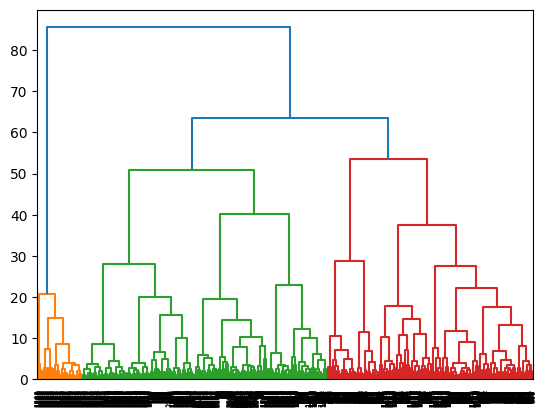

In [ ]:
# antes de decir cantidad de clusters ver dendograma:
dendrogram(Z)
plt.show()
# son 8000 y pico de filas, se puede ver como se comportan aprox

En base a las ramas del dendograma que parecen más aislables, tomamos 21 clusters

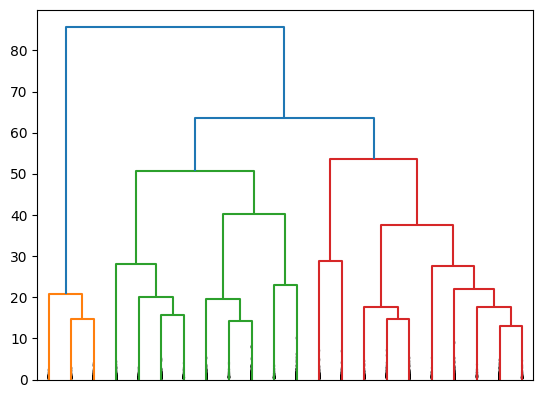

In [ ]:
# truncar dendograma en ultimos 22 grupos
dendrogram(Z,truncate_mode = 'lastp', p = 22, show_leaf_counts = False, show_contracted = True)
plt.show()

Asignamos los clusters:

In [ ]:
clust_agl = AgglomerativeClustering(n_clusters = 21)

clustering_jerarquico = clust_agl.fit_predict(cultivos_z)

clustering_jerarquico_agl = cultivos.copy()

clustering_jerarquico_agl['Cluster'] = clustering_jerarquico

clustering_jerarquico_agl.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,11
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,11
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,11
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,11
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,11


### Coeficiente de silueta:

In [ ]:
# Coeficiente Silhouette
silhouette_avg = silhouette_score(cultivos_z, clustering_jerarquico)
silhouette_avg

0.33642086801916204

Nos da un valor bastante bajo lo que podria indicar distancia entre clusters poco significativa.

### GAP:

In [ ]:
gs_obj = OptimalK(n_jobs=-1, n_iter=200)
n_clusters = gs_obj(cultivos_z.astype('float'), n_refs=30,
cluster_array=np.arange(2, 100))
print('Optimal number of clusters: ', n_clusters)

Optimal number of clusters:  96
